C:\Users\thiag\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mantida 97.77% da informação do conjunto inicial de dados


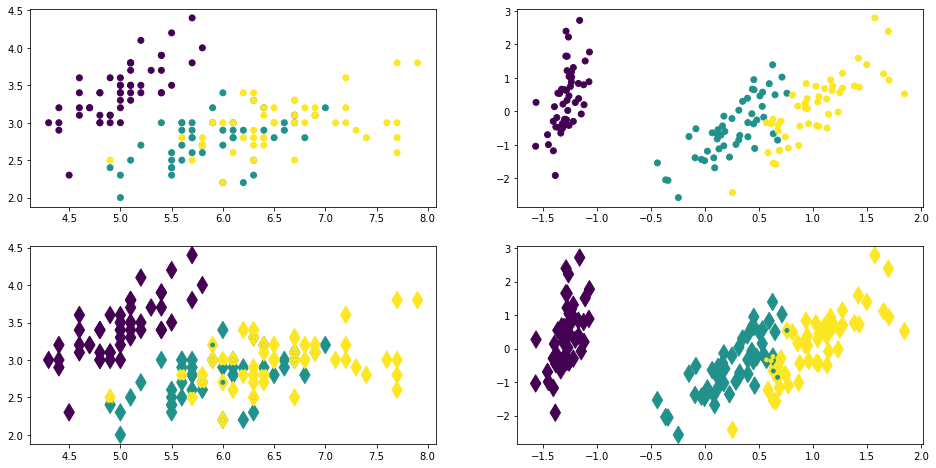

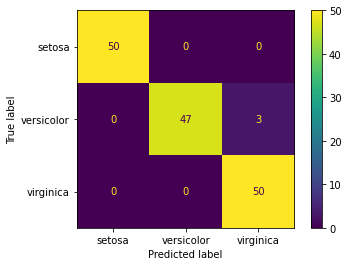

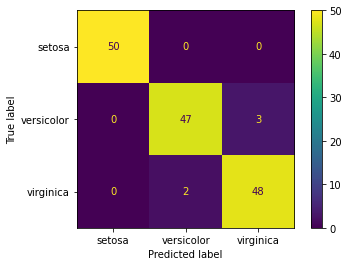

In [1]:
from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = load_iris()

features =data.data
target = data.target


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(features[:,0], features[:,1], c=target,marker='o',cmap='viridis')

Classificador = MLPClassifier(hidden_layer_sizes = (30,15), alpha=1, max_iter=500)
Classificador.fit(features,target)
predicao = Classificador.predict(features)

plt.subplot(2,2,3)
plt.scatter(features[:,0], features[:,1], c=predicao,marker='d',cmap='viridis',s=150)
plt.scatter(features[:,0], features[:,1], c=target,marker='o',cmap='viridis',s=15)





pca = PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(features)
pca_features = pca.transform(features)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))

plt.subplot(2,2,2)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target,marker='o',cmap='viridis')


ClassificadorPCA = MLPClassifier(hidden_layer_sizes = (18,12,6), alpha=1, max_iter=666)
ClassificadorPCA.fit(pca_features,target)


predicao = ClassificadorPCA.predict(pca_features)

plt.subplot(2,2,4)
plt.scatter(pca_features[:,0], pca_features[:,1], c=predicao,marker='d',cmap='viridis',s=150)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target,marker='o',cmap='viridis',s=15)
plt.show()


plot_confusion_matrix(Classificador, features, target,include_values=True,display_labels=data.target_names)
plt.show()

plot_confusion_matrix(ClassificadorPCA, pca_features, target,include_values=True,display_labels=data.target_names)
plt.show()